In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
employer_data = pd.read_csv('diligence_initech.fake_initech_employer_data.csv', parse_dates=['month'])
worker_data = pd.read_csv('diligence_initech.fake_initech_worker_data.csv', parse_dates=['month'])

grouped_employer_data = employer_data.groupby(['month', 'market']).sum().reset_index()
grouped_employer_data.head()

,month,market,employer_id,revenue,revenue_minus_direct_costs
0,2015-01-01,other,khcezEHqw5MZCSE5QdioEP08ZaI=,0.0,0.0
1,2015-01-01,sf-bay-area,9chMy7swbDZ3sqaDCqLlLUQDsMY=3laXJ20VXJNgfEa0zE...,500.0,50.0
2,2015-02-01,other,khcezEHqw5MZCSE5QdioEP08ZaI=,0.0,0.0
3,2015-02-01,sf-bay-area,ldW+l2PmzbyDN38Q2cKswMNO6k0=6b8e086+uF3yjICwYm...,5687.5,87.5
4,2015-03-01,other,khcezEHqw5MZCSE5QdioEP08ZaI=,0.0,0.0


# Market Revenue Dynamics

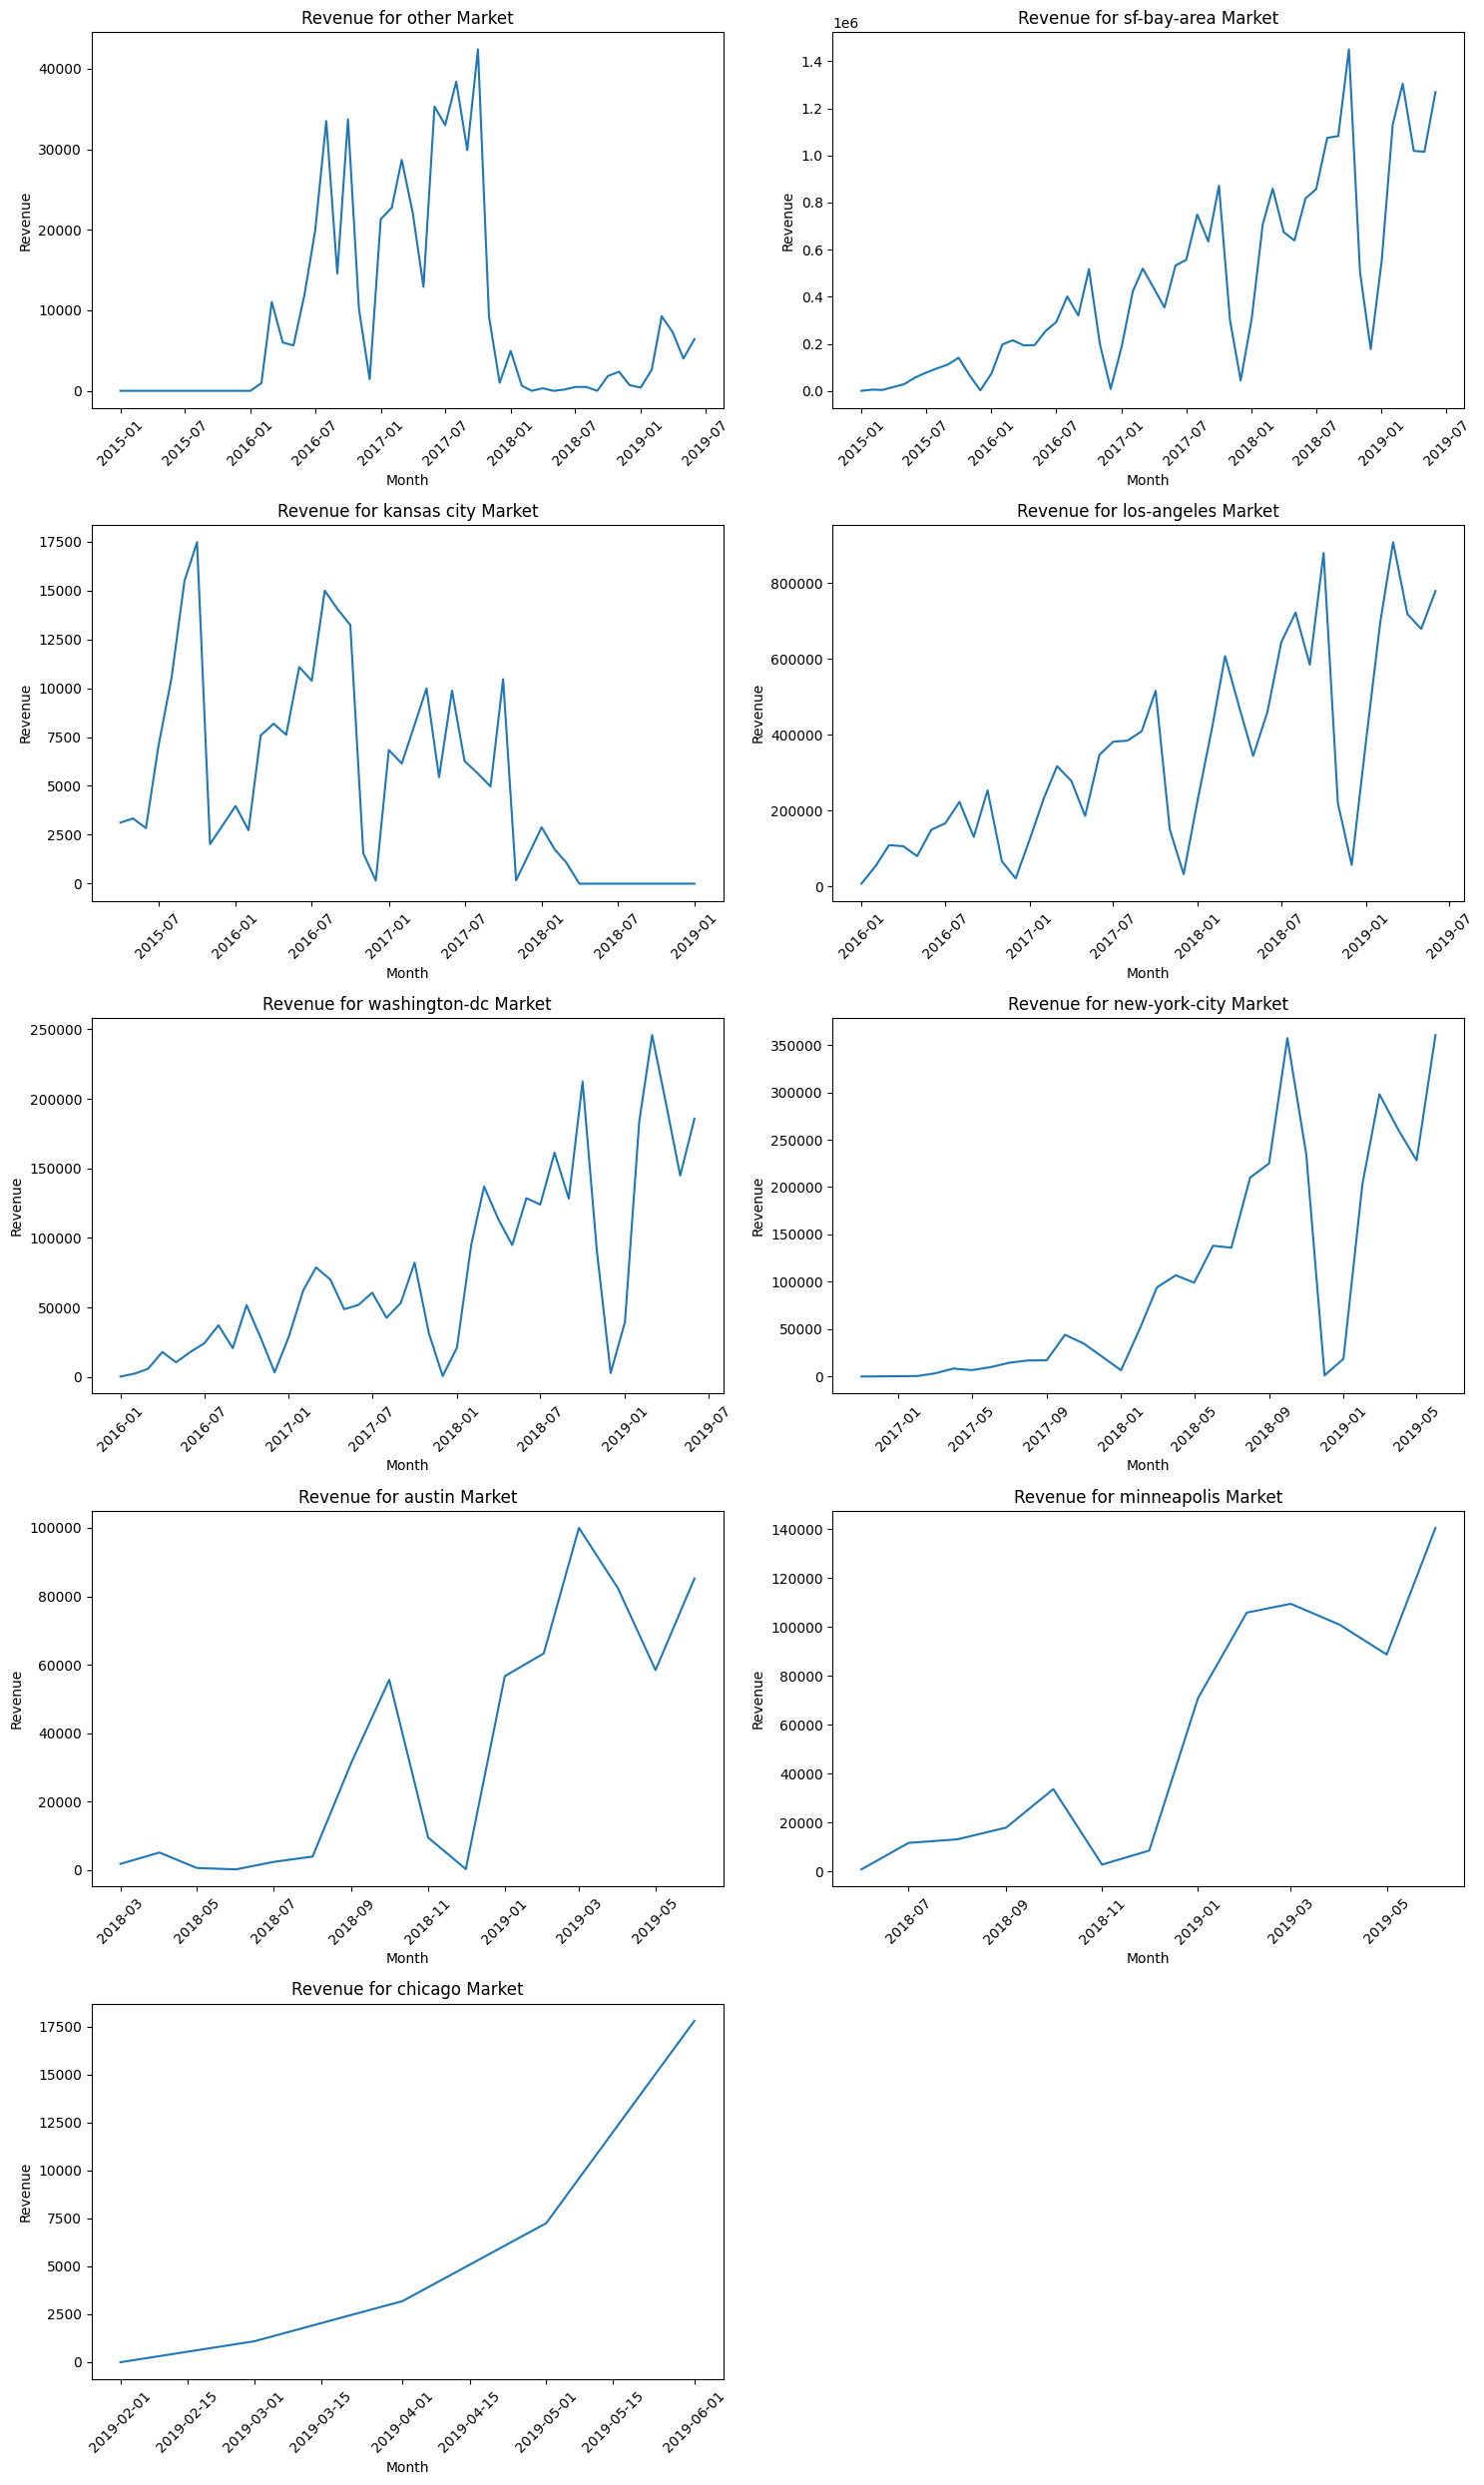

In [53]:
employer_data = pd.read_csv('diligence_initech.fake_initech_employer_data.csv', parse_dates=['month'])
worker_data = pd.read_csv('diligence_initech.fake_initech_worker_data.csv', parse_dates=['month'])

grouped_employer_data = employer_data.groupby(['month', 'market']).sum().reset_index()
grouped_employer_data.head()

unique_markets = grouped_employer_data['market'].unique()
n_cols = 2
n_rows = int(len(unique_markets) / n_cols) + (len(unique_markets) % n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
for i, market in enumerate(unique_markets):
    ax = axes[i//n_cols, i%n_cols]
    
    market_data = grouped_employer_data[grouped_employer_data['market'] == market]
    
    ax.plot(market_data['month'], market_data['revenue']) # Replace 'revenue' with your actual revenue column name
    
    ax.set_title(f'Revenue for {market} Market')
    ax.set_xlabel('Month')
    ax.set_ylabel('Revenue')
    ax.tick_params(axis='x', rotation=45)
if len(unique_markets) % n_cols != 0:
    for i in range(len(unique_markets), n_rows*n_cols):
        fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

In [54]:
employer_count = employer_data.groupby('month').count()
worker_count = worker_data.groupby('month').count()

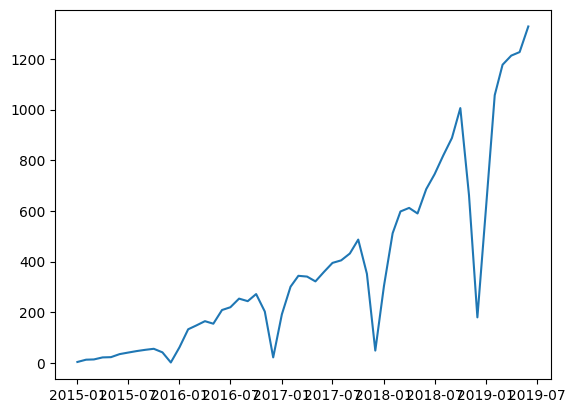

In [55]:
plt.plot(employer_count['employer_id'])
plt.show()

In [63]:
data = pd.DataFrame(employer_count['employer_id'])
emp_data = data.reset_index()
data2 = pd.DataFrame(worker_count['worker_id'])
wrk_data = data2.reset_index()

In [64]:
merged_df = pd.merge(emp_data, wrk_data, on='month')

In [65]:
merged_df.columns = ['month', 'employer_count', 'worker_count']

In [66]:
merged_df['empl_to_wrk_ratio'] = merged_df['employer_count'] / merged_df['worker_count']

In [67]:
merged_df

,month,employer_count,worker_count,empl_to_wrk_ratio
0,2015-01-01,4,2,2.000000
1,2015-02-01,13,8,1.625000
2,2015-03-01,14,7,2.000000
3,2015-04-01,22,22,1.000000
4,2015-05-01,23,24,0.958333
5,2015-06-01,35,43,0.813953
6,2015-07-01,41,53,0.773585
7,2015-08-01,47,78,0.602564
8,2015-09-01,52,85,0.611765
9,2015-10-01,56,100,0.560000
